<a href="https://colab.research.google.com/github/naufal-sulthan/data-analyst/blob/main/SMA_Project_Readable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [82]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,year_month,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,"2,020.00",2020-08,8.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08,8.00
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA,"2,020.00",2020-08,8.00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,"2,020.00",2020-07,7.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,"2,020.00",2020-07,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,USA,"1,958.00",1958-02,2.00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,USA,USA,"1,958.00",1958-02,2.00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,USA,"1,957.00",1957-12,12.00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,KAZ,"1,957.00",1957-11,11.00


In [11]:
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [12]:
df_data.count()

Unnamed: 0.1      4324
Unnamed: 0        4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

In [13]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [15]:
df_data.drop(["Unnamed: 0.1",	"Unnamed: 0"], axis=1, inplace=True)

In [16]:
duplicated_rows = df_data[df_data.duplicated()]
print(duplicated_rows.shape)
duplicated_rows

(1, 7)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [17]:
df_data.drop_duplicates(inplace=True)

# Price

In [18]:
price = df_data.dropna()
print(price.shape)
price

(963, 7)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [19]:
price.Price = price.Price.astype(str).str.replace(',', "")
price.Price = pd.to_numeric(price.Price)
price.sort_values('Price', ascending=False).head()

<ipython-input-19-b384568a3e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price.Price = price.Price.astype(str).str.replace(',', "")
<ipython-input-19-b384568a3e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price.Price = pd.to_numeric(price.Price)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success


In [20]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    963 non-null    object 
 1   Location        963 non-null    object 
 2   Date            963 non-null    object 
 3   Detail          963 non-null    object 
 4   Rocket_Status   963 non-null    object 
 5   Price           963 non-null    float64
 6   Mission_Status  963 non-null    object 
dtypes: float64(1), object(6)
memory usage: 60.2+ KB


In [21]:
# Menyimpan dataframe ke dalam file CSV
price.to_csv('price.csv', index=False)  # index=False agar indeks tidak disertakan dalam file CSV

## Descriptive Statistics

In [22]:
price.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company:

Create a chart that shows the number of space mission launches by organisation.

1. Judul
2. potong diagram sampai less then ten (98)



In [23]:
df_data.Organisation.nunique()

56

In [24]:
# Data contoh
company = df_data['Organisation'].value_counts()

# Tentukan ambang batas untuk nilai terkecil yang akan digabungkan
threshold = 10

# Ambil nilai-nilai terkecil yang ingin digabungkan
small_values = company[company < threshold]

# Gabungkan nilai-nilai terkecil menjadi satu
company['Less Than Ten'] = small_values.sum()

# Hapus nilai-nilai terkecil dari dataframe
company.drop(small_values.index, inplace=True)

# Tampilkan hasil
print(company)


Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
Less Than Ten         98
Name: count, dtype: int64


In [25]:

# Mengurutkan data berdasarkan nilai (jumlah peluncuran) dari terkecil ke terbesar
sorted_company = sorted(company.items(), key=lambda x: x[1])

# Membuat diagram batang horizontal
org_bar = px.bar(x=[item[1] for item in sorted_company],  # Nilai jumlah peluncuran
                 y=[item[0] for item in sorted_company],  # Nama perusahaan
                 orientation='h',
                 color=[item[1] for item in sorted_company],  # Warna berdasarkan jumlah peluncuran
                 color_continuous_scale=px.colors.sequential.haline,
                 text=[item[1] for item in sorted_company],  # Teks di ujung batang
                 title='Number of Launches per Company')

org_bar.update_layout(xaxis_title='Number of Launches',
                      yaxis_title='Company',
                      coloraxis_showscale=False)

org_bar.update_traces(textposition='outside')

org_bar.show()


In [26]:
top_ten_company = df_data.Organisation.value_counts()[:10]
top_ten_company.sort_values(ascending=False, inplace=True)
top_ten_company

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [27]:
# Mengurutkan data berdasarkan nilai (jumlah peluncuran) dari terkecil ke terbesar
sorted_company = sorted(top_ten_company.items(), key=lambda x: x[1])

# Membuat diagram batang horizontal
org_bar = px.bar(x=[item[1] for item in sorted_company],  # Nilai jumlah peluncuran
                 y=[item[0] for item in sorted_company],  # Nama perusahaan
                 orientation='h',
                 color=[item[1] for item in sorted_company],  # Warna berdasarkan jumlah peluncuran
                 color_continuous_scale=px.colors.sequential.haline,
                 text=[item[1] for item in sorted_company],  # Teks di ujung batang
                 title='Number of Launches per Company')

org_bar.update_layout(xaxis_title='Number of Launches',
                      yaxis_title='Company',
                      coloraxis_showscale=False)

org_bar.update_traces(textposition='outside')

org_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

1. Warna diagram
2. Judul pada index diagram


In [28]:
rocket = df_data.Rocket_Status.value_counts()
rocket

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

In [29]:
fig = px.pie(labels=rocket.index,
             values=rocket.values,
             title="Number of Active versus Retired Rockets",
             names=rocket.index,
             hole=0.4)

fig.update_traces(textposition='inside',
                  textfont_size=15,
                  textinfo='percent')

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

1. Warna diagram



In [30]:
mission = df_data.Mission_Status.value_counts()
mission

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [31]:
fig = px.pie(labels=mission.index,
             values=mission.values,
             title="Distribution of Mission Status",
             names=mission.index,
             hole=0.4)

fig.update_traces(textposition='inside',
                  textfont_size=15,
                  textinfo='percent')

fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).


1.   Dalam file csv kolom price tidak berformat angka
2.   Dalam file csv kolom price ketika diubah format mata uang hanya sebagian baris yang berubah



<ipython-input-32-588d44c9924d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



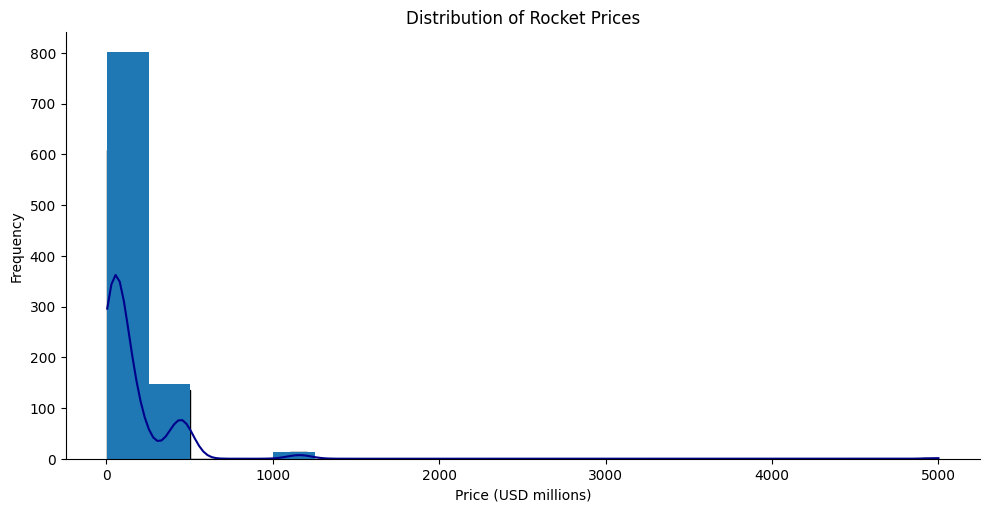

In [32]:
# Convert the Price column to float and fill missing values with 0
price['Price'] = price['Price'].astype(float).fillna(0)

sns.displot(price.Price,
            bins=50,
            aspect=2,
            kde=True,
            color='darkblue')

# Create a histogram of the Price column
plt.hist(price['Price'], bins=20)
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Rocket Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [33]:
df_data['launch_country'] = df_data["Location"].str.split(", ").str[-1].str.strip()

In [34]:
df_data['launch_country'].replace({'Gran Canaria': 'USA', 'Yellow Sea': 'China',
                                  'Pacific Missile Range Facility': 'USA', 'Barents Sea': 'Russian Federation',
                                  'Russia': 'Russian Federation', 'Pacific Ocean': 'USA',
                                  'Marshall Islands': 'USA', 'Iran': 'Iran, Islamic Republic of',
                                  'North Korea': "Korea, Democratic People's Republic of", 'South Korea': "Korea, Republic of",
                                  'Shahrud Missile Test Site': "Iran, Islamic Republic of", 'New Mexico': "USA" },
                                  inplace=True)

In [35]:
df_data['launch_country_code'] = df_data['launch_country'].apply(lambda x: (countries.get(x).alpha3))

In [36]:
launch_total = df_data.groupby(['launch_country', 'launch_country_code'], as_index=False).agg({'launch_country': pd.Series.count})
launch_total.rename(columns={'launch_country': 'Total_launches'}, inplace=True)
launch_total

,launch_country_code,Total_launches
0,AUS,6
1,BRA,3
2,CHN,268
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


In [37]:
world_map = px.choropleth(launch_total,
                          locations='launch_country_code',
                          color='Total_launches',
                          title='Number of Launches',
                          color_continuous_scale=px.colors.sequential.Blugrn)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [38]:
fail = df_data.groupby(['launch_country', 'launch_country_code'], as_index=False).agg({'Mission_Status': lambda x: (x == 'Failure').sum()})
fail.rename(columns={'Mission_Status': 'Total_launches'}, inplace=True)
fail

,launch_country,launch_country_code,Total_launches
0,Australia,AUS,3
1,Brazil,BRA,2
2,China,CHN,19
3,France,FRA,13
4,India,IND,8
5,"Iran, Islamic Republic of",IRN,8
6,Israel,ISR,2
7,Japan,JPN,10
8,Kazakhstan,KAZ,72
9,Kenya,KEN,0


In [39]:
world_map = px.choropleth(fail,
                          locations='launch_country_code',
                          color='Total_launches',
                          title='Number of Launches',
                          color_continuous_scale=px.colors.sequential.Reds)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [40]:
com = df_data.groupby(by=['launch_country_code', 'Organisation', 'Mission_Status'], as_index=False).agg({'launch_country': pd.Series.count})

com = com.sort_values('Mission_Status', ascending=False)
com

,launch_country_code,Organisation,Mission_Status,launch_country
0,AUS,AMBA,Success,1
81,RUS,RVSN USSR,Success,1119
76,RUS,Kosmotras,Success,10
75,RUS,Khrunichev,Success,1
74,RUS,Eurockot,Success,12
...,...,...,...,...
90,USA,AMBA,Failure,3
15,CHN,OneSpace,Failure,1
94,USA,Boeing,Failure,3
14,CHN,Landspace,Failure,1


In [41]:
burst = px.sunburst(com,
                 path = ['Mission_Status', 'launch_country_code', 'Organisation'],
                 values = 'launch_country',
                 title = 'Where do Discoveries Take Place?',)

burst.update_layout(xaxis_title = 'Number of Prizes',
                    yaxis_title = 'city',
                    coloraxis_showscale = False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [42]:
total_spent = price.groupby('Organisation')['Price'].sum().reset_index()
total_spent = total_spent.sort_values(by='Price', ascending=False)
total_spent.columns = ['Organisation', 'Total_Spent']
print(total_spent)

       Organisation  Total_Spent
14             NASA    76,280.00
0       Arianespace    16,345.00
21              ULA    14,798.00
16        RVSN USSR    10,000.00
2              CASC     6,310.51
20           SpaceX     5,444.00
15         Northrop     3,930.00
12              MHI     3,532.50
8              ISRO     2,177.00
22     US Air Force     1,550.92
23           VKS RF     1,548.90
7               ILS     1,320.00
1            Boeing     1,241.00
18        Roscosmos     1,187.50
13  Martin Marietta       721.40
10        Kosmotras       638.00
5          Eurockot       543.40
11         Lockheed       280.00
9              JAXA       168.00
17       Rocket Lab        97.50
4               ESA        37.00
6            ExPace        28.30
3               EER        20.00
19           Sandia        15.00
24     Virgin Orbit        12.00


In [43]:
top_10_total_spent = total_spent.head(10)
top_10_total_spent = top_10_total_spent.sort_values(by='Total_Spent', ascending=True)
fig = px.bar(top_10_total_spent,
             x='Total_Spent',
             y='Organisation',
             title='Top 10 Organisations by Total Spent')

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [44]:
# Remove any non-numeric characters from the cost column
df_data['Price'] = df_data['Price'].replace('[\$,]', '', regex=True)

# Convert the cost column to numeric, coercing errors
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Fill NaN values that were unable to be converted to numeric
df_data['Price'] = df_data['Price'].fillna(0)

In [45]:
# Group by organization and calculate total cost and number of launches
organisation_data = df_data.groupby('Organisation').agg({'Price': 'sum', 'Organisation': 'count'}).rename(columns={'Organisation': 'launches'}).reset_index()

# Calculate average cost per launch
organisation_data['cost_per_launch'] = organisation_data['Price'] / organisation_data['launches']

In [46]:
# Sort by cost per launch
organisation_data = organisation_data.sort_values(by='cost_per_launch', ascending=False)
print(organisation_data)

        Organisation     Price  launches  cost_per_launch
35              NASA 76,280.00       203           375.76
48               ULA 14,798.00       140           105.70
3        Arianespace 16,345.00       279            58.58
46            SpaceX  5,444.00       100            54.44
36          Northrop  3,930.00        83            47.35
32               MHI  3,532.50        84            42.05
14          Eurockot    543.40        13            41.80
28         Kosmotras    638.00        22            29.00
19               ILS  1,320.00        46            28.70
23              ISRO  2,177.00        76            28.64
7               CASC  6,310.51       250            25.24
24              JAXA    168.00         7            24.00
42         Roscosmos  1,187.50        55            21.59
12               EER     20.00         1            20.00
44            Sandia     15.00         1            15.00
53      Virgin Orbit     12.00         1            12.00
49      US Air

<ipython-input-47-270ded76b2fc>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




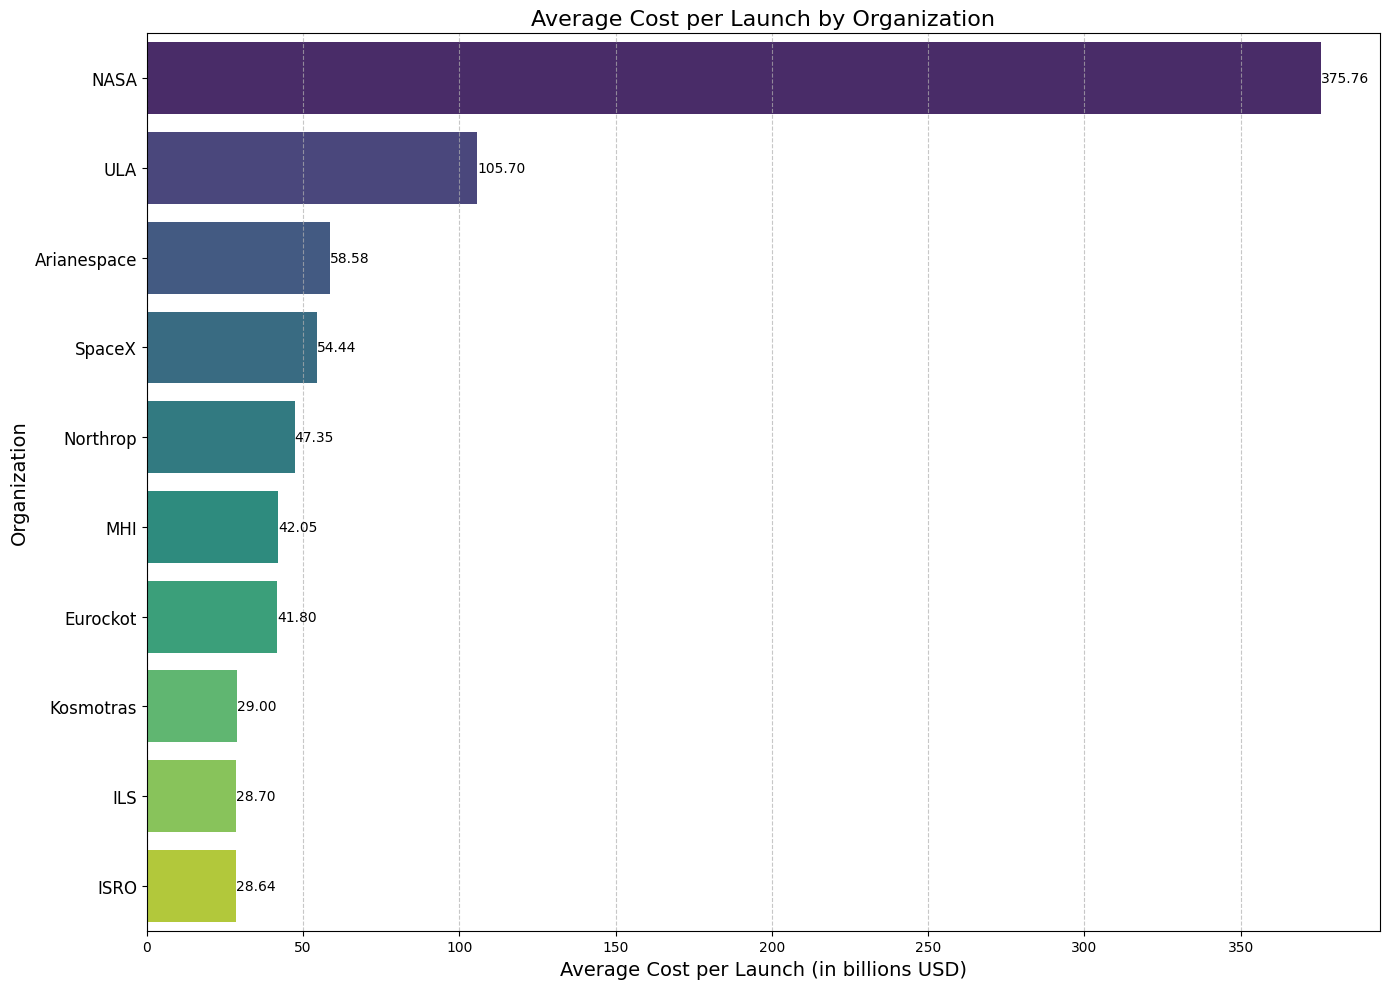

In [47]:
# Mengambil data top 10 organisasi berdasarkan biaya per peluncuran
organisation_data_viz = organisation_data.head(10)

# Membuat figure dan ukuran plot
plt.figure(figsize=(14,10))

# Membuat barplot dengan palet warna berbeda
sns.barplot(x='cost_per_launch', y='Organisation', data=organisation_data_viz, palette='viridis')

# Menambahkan judul dan label sumbu yang lebih deskriptif
plt.title('Average Cost per Launch by Organization', fontsize=16)
plt.xlabel('Average Cost per Launch (in billions USD)', fontsize=14)
plt.ylabel('Organization', fontsize=14)

# Menambahkan nilai pada batang
for index, value in enumerate(organisation_data_viz['cost_per_launch']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

# Rotasi label pada sumbu Y untuk kemudahan pembacaan
plt.yticks(rotation=0, fontsize=12)

# Menambahkan grid horizontal
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [48]:
# Convert the date column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract year from the date column
df_data['Year'] = df_data['Date'].dt.year

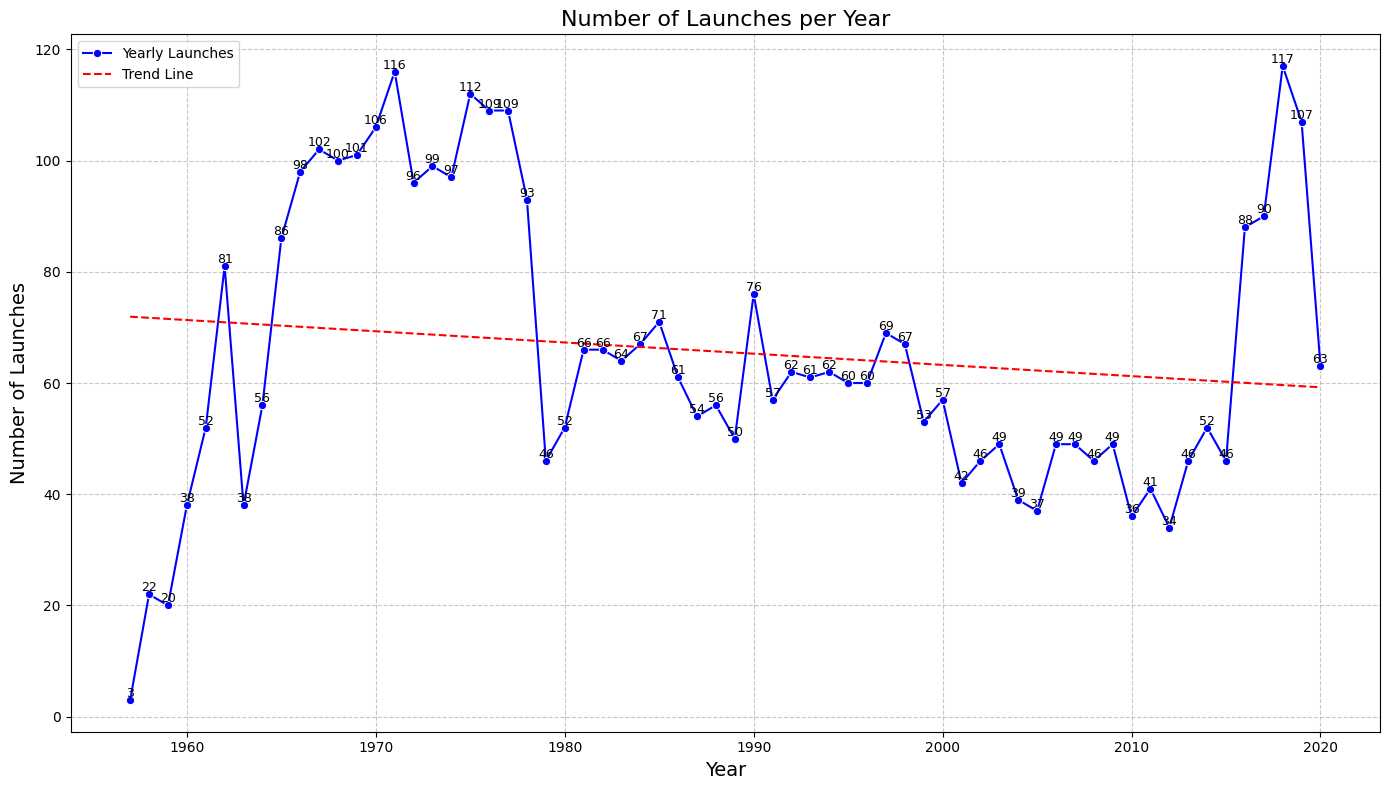

In [49]:
# Assuming df_data is already loaded and preprocessed
# Group by year and count the number of launches
launches_per_year = df_data.groupby(df_data['Date'].dt.year).size().reset_index(name='launches')
launches_per_year.columns = ['Year', 'Launches']

# Fit a linear regression model to show the trend
z = np.polyfit(launches_per_year['Year'], launches_per_year['Launches'], 1)
p = np.poly1d(z)

# Plot the number of launches per year with improvisations
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Launches', data=launches_per_year, marker='o', color='b', label='Yearly Launches')
plt.plot(launches_per_year['Year'], p(launches_per_year['Year']), "r--", label='Trend Line')

# Add data labels to each point
for x, y in zip(launches_per_year['Year'], launches_per_year['Launches']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=9)

# Customize title and labels
plt.title('Number of Launches per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.


1.   Visualisasi data



In [50]:
# Extract year and month from the date column
df_data['year_month'] = df_data['Date'].dt.to_period('M')

# Group by year and month and count the number of launches
launches_per_month = df_data.groupby('year_month').size().reset_index(name='launches')
launches_per_month

<ipython-input-50-d4f31b59ba8e>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,year_month,launches
0,1957-10,1
1,1957-11,1
2,1957-12,1
3,1958-02,2
4,1958-03,3
...,...,...
742,2020-04,5
743,2020-05,9
744,2020-06,7
745,2020-07,14


In [51]:
# Identify the month with the highest number of launches
max_launches_month = launches_per_month.loc[launches_per_month['launches'].idxmax()]
print("Month with the highest number of launches:", max_launches_month)


Month with the highest number of launches: year_month    1968-04
launches           16
Name: 120, dtype: object


In [52]:
# Calculate a 6-month rolling average
launches_per_month['rolling_avg'] = launches_per_month['launches'].rolling(window=6).mean()
launches_per_month

,year_month,launches,rolling_avg
0,1957-10,1,NaN
1,1957-11,1,NaN
2,1957-12,1,NaN
3,1958-02,2,NaN
4,1958-03,3,NaN
...,...,...,...
742,2020-04,5,9.67
743,2020-05,9,9.17
744,2020-06,7,7.67
745,2020-07,14,8.67


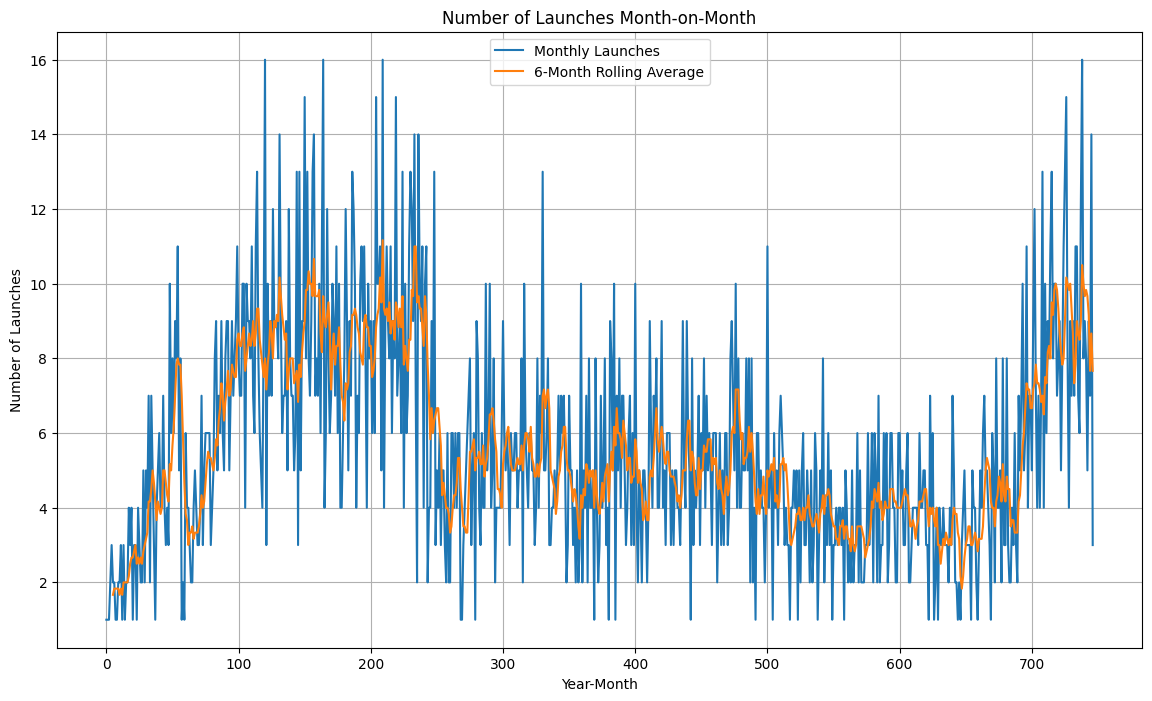

In [53]:
# Plot the number of launches month-on-month with a rolling average
plt.figure(figsize=(14, 8))
sns.lineplot(x=launches_per_month.index, y='launches', data=launches_per_month, label='Monthly Launches')
sns.lineplot(x=launches_per_month.index, y='rolling_avg', data=launches_per_month, label='6-Month Rolling Average')
plt.title('Number of Launches Month-on-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [54]:
# Convert the date column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract month from the date column
df_data['Month'] = df_data['Date'].dt.month


In [55]:
# Group by month and count the number of launches
launches_per_month = df_data.groupby('Month').size().reset_index(name='launches')
launches_per_month

,Month,launches
0,1.00,265
1,2.00,323
2,3.00,349
3,4.00,366
4,5.00,320
5,6.00,386
6,7.00,347
7,8.00,358
8,9.00,354
9,10.00,375


In [56]:
# Sort by the number of launches
launches_per_month_sorted = launches_per_month.sort_values(by='launches', ascending=False)
print("Most popular months for launches:")
print(launches_per_month_sorted.head())

print("\nLeast popular months for launches:")
print(launches_per_month_sorted.tail())

Most popular months for launches:
    Month  launches
11  12.00       430
5    6.00       386
9   10.00       375
3    4.00       366
7    8.00       358

Least popular months for launches:
    Month  launches
6    7.00       347
10  11.00       324
1    2.00       323
4    5.00       320
0    1.00       265


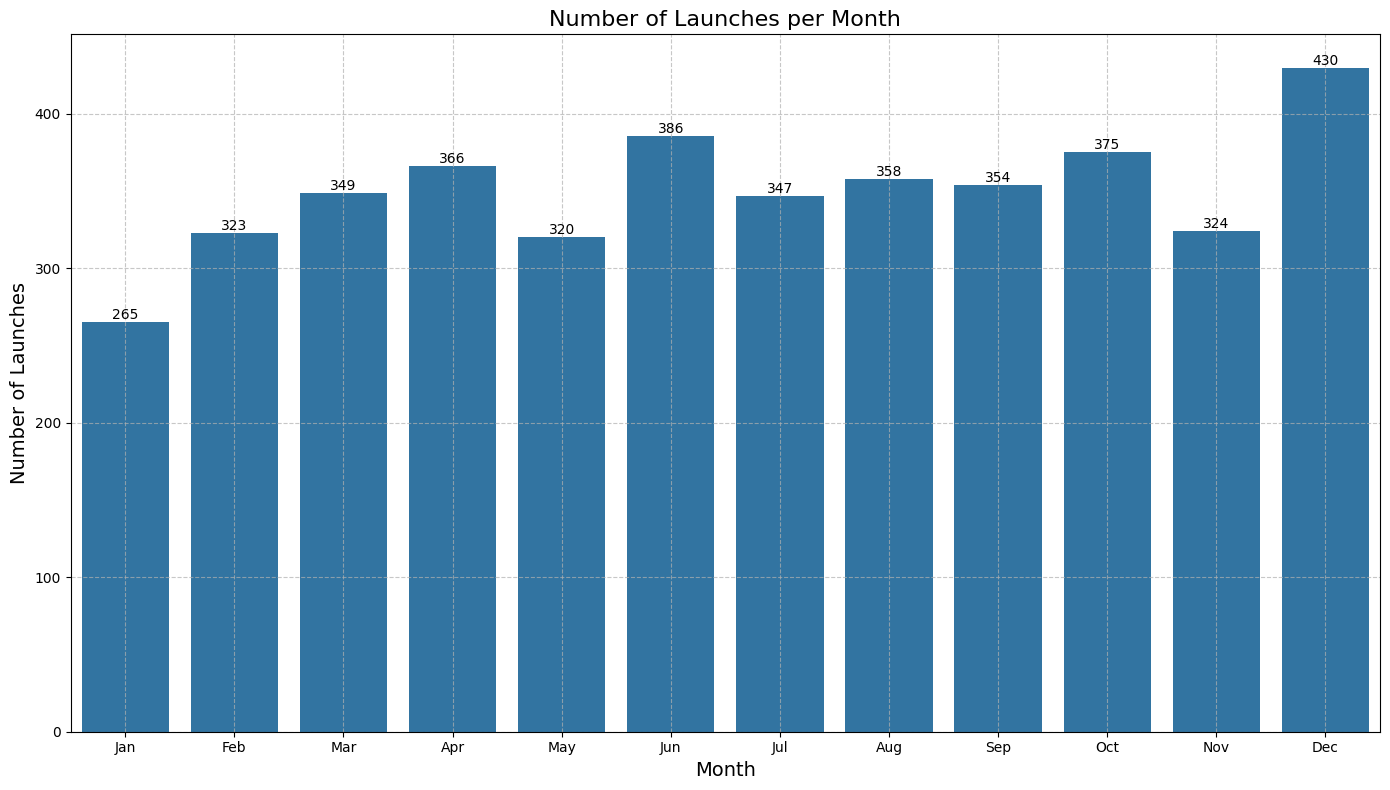

In [57]:
# Plot the number of launches per month with improvisations
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='launches', data=launches_per_month)

# Add data labels to each bar
for index, value in enumerate(launches_per_month['launches']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

# Customize title and labels
plt.title('Number of Launches per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [58]:
# Remove any non-numeric characters from the cost column
df_data['Price'] = df_data['Price'].replace('[\$,]', '', regex=True)

# Convert the cost column to numeric, coercing errors
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Fill NaN values that were unable to be converted to numeric
df_data['Price'] = df_data['Price'].fillna(0)


In [59]:
# Group by year and calculate the average cost
average_price_per_year = df_data.groupby('Year')['Price'].mean().reset_index()
average_price_per_year

,Year,Price
0,"1,957.00",0.00
1,"1,958.00",0.00
2,"1,959.00",0.00
3,"1,960.00",0.00
4,"1,961.00",0.00
...,...,...
59,"2,016.00",57.79
60,"2,017.00",50.96
61,"2,018.00",48.70
62,"2,019.00",40.67


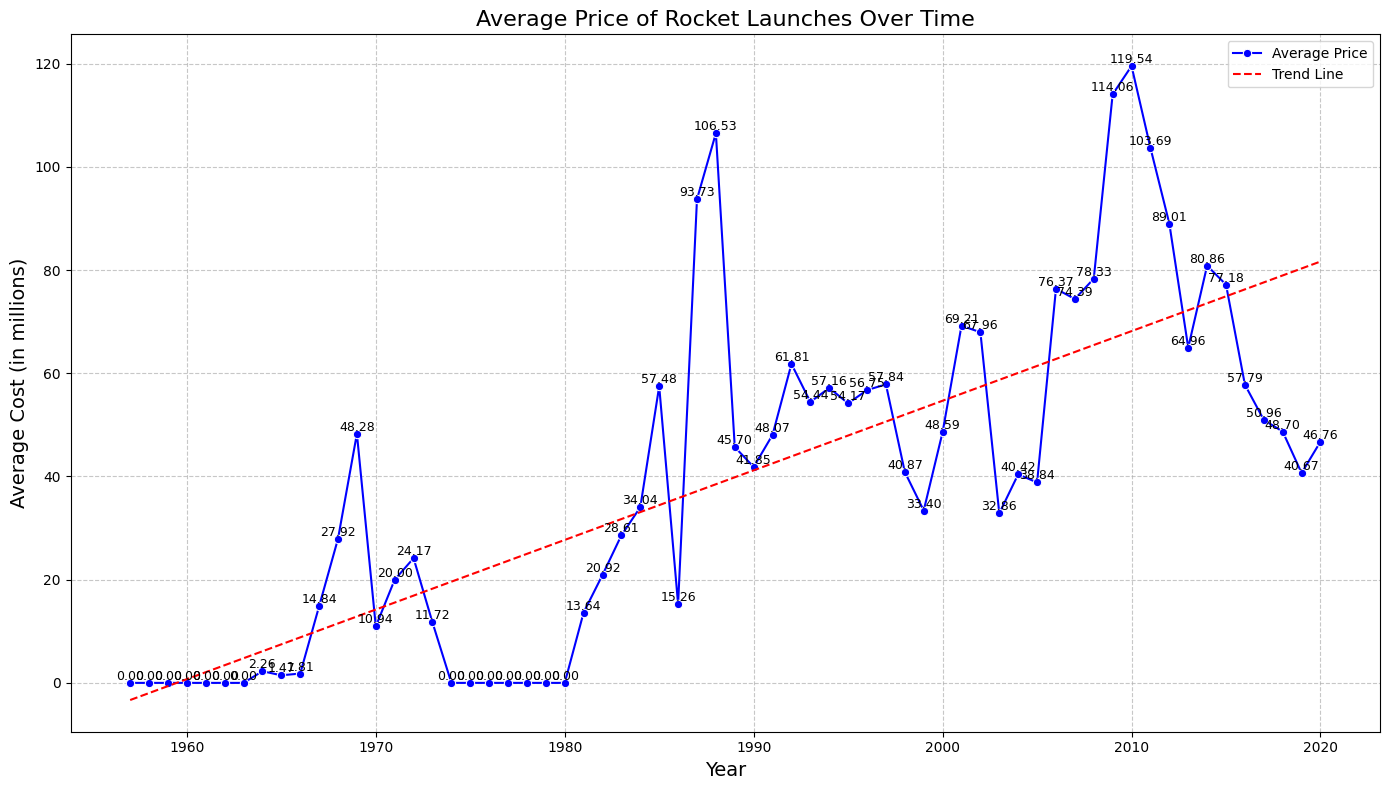

In [60]:
# Fit a linear regression model to show the trend
z = np.polyfit(average_price_per_year['Year'], average_price_per_year['Price'], 1)
p = np.poly1d(z)

# Plot the average price of rocket launches over time with improvisations
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Price', data=average_price_per_year, marker='o', color='b', label='Average Price')

# Plot the trend line
plt.plot(average_price_per_year['Year'], p(average_price_per_year['Year']), "r--", label='Trend Line')

# Add data labels to each point
for x, y in zip(average_price_per_year['Year'], average_price_per_year['Price']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

# Customize title and labels
plt.title('Average Price of Rocket Launches Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Cost (in millions)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [61]:
# Group by organization and count the number of launches
top_organizations = df_data['Organisation'].value_counts().head(10).index

# Filter the data to include only the top 10 organizations
df_top_organizations = df_data[df_data['Organisation'].isin(top_organizations)]


In [62]:
# Group by year and organization and count the number of launches
launches_per_year_org = df_top_organizations.groupby(['Year', 'Organisation']).size().reset_index(name='launches')
launches_per_year_org

,Year,Organisation,launches
0,"1,957.00",RVSN USSR,2
1,"1,958.00",NASA,2
2,"1,958.00",RVSN USSR,5
3,"1,958.00",US Air Force,2
4,"1,959.00",General Dynamics,1
...,...,...,...
317,"2,019.00",VKS RF,8
318,"2,020.00",Arianespace,4
319,"2,020.00",CASC,19
320,"2,020.00",ULA,4


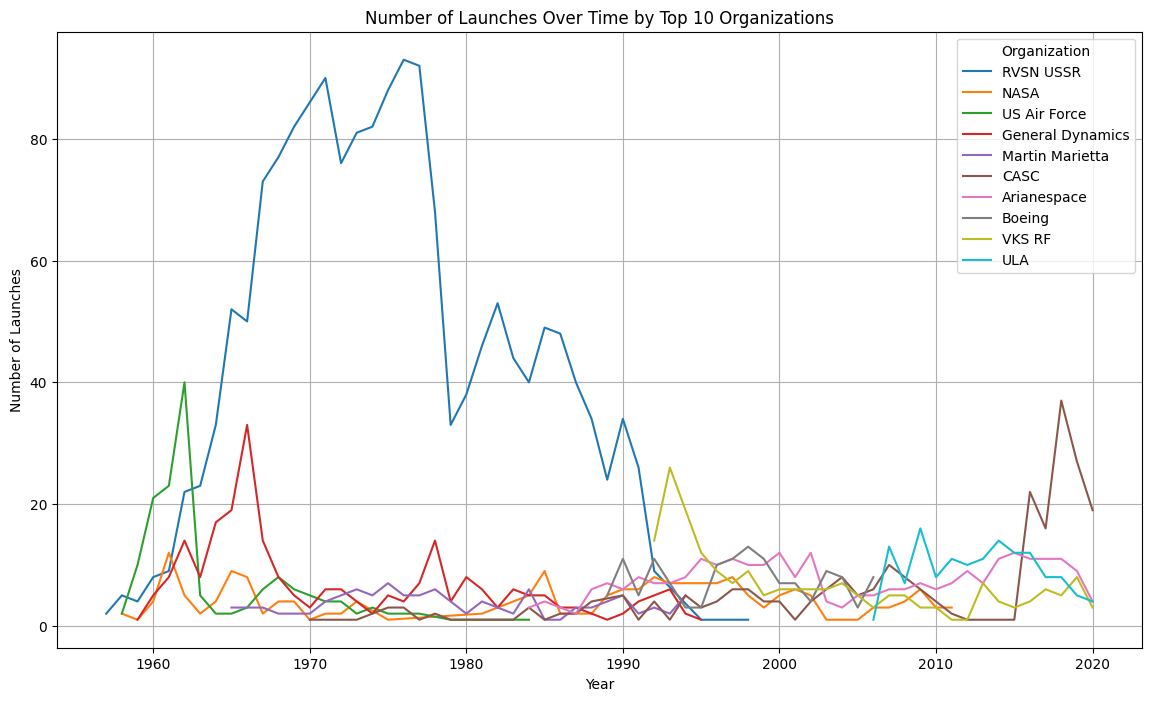

In [63]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the number of launches over time for each organization
sns.lineplot(x='Year', y='launches', hue='Organisation', data=launches_per_year_org)

# Add title and labels
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organization')
plt.grid(True)
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [64]:
# Filter for the Cold War period
cold_war_df = df_data[df_data['Year'] <= 1991]

# Filter for USA and USSR organizations
usa_ussr_df = cold_war_df[cold_war_df['Organisation'].str.contains('NASA|USSR|Soviet', case=False, na=False)]

# Standardize the organization names
usa_ussr_df['Organisation'] = usa_ussr_df['Organisation'].str.replace('NASA', 'USA', case=False)
usa_ussr_df['Organisation'] = usa_ussr_df['Organisation'].str.replace('USSR|Soviet', 'USSR', regex=True, case=False)

# Group by year and organization and count the number of launches
launches_per_year_country = usa_ussr_df.groupby(['Year', 'Organisation']).size().reset_index(name='launches')
launches_per_year_country

<ipython-input-64-8f4827e75c00>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-8f4827e75c00>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Organisation,launches
0,"1,957.00",RVSN USSR,2
1,"1,958.00",RVSN USSR,5
2,"1,958.00",USA,2
3,"1,959.00",RVSN USSR,4
4,"1,959.00",USA,1
...,...,...,...
57,"1,989.00",USA,5
58,"1,990.00",RVSN USSR,34
59,"1,990.00",USA,6
60,"1,991.00",RVSN USSR,26


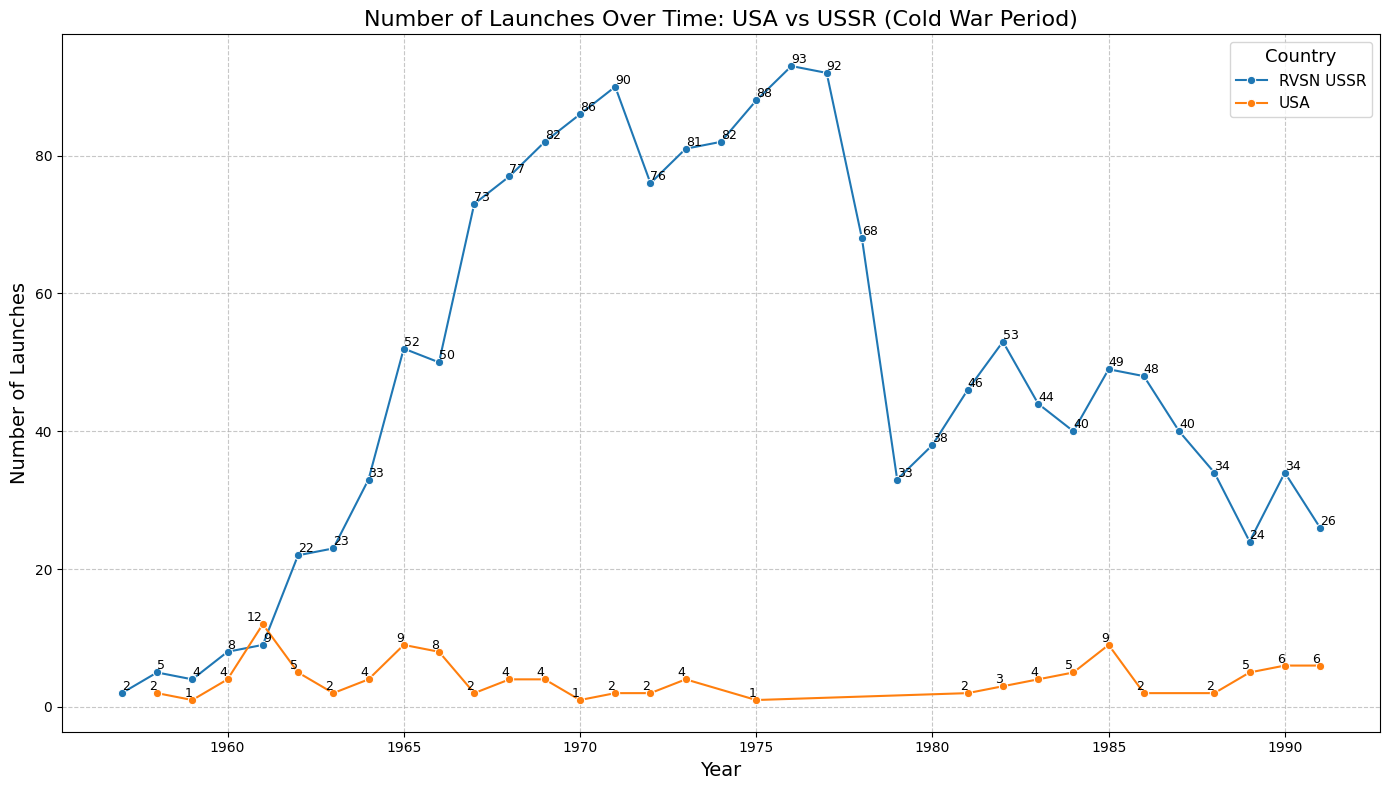

In [65]:
# Assuming launches_per_year_country is already loaded and preprocessed
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the number of launches over time for USA and USSR with improvisations
sns.lineplot(x='Year', y='launches', hue='Organisation', data=launches_per_year_country, marker='o')

# Add data labels to each point
for i in range(len(launches_per_year_country)):
    plt.text(launches_per_year_country['Year'][i],
             launches_per_year_country['launches'][i],
             launches_per_year_country['launches'][i],
             ha='right' if launches_per_year_country['Organisation'][i] == 'USA' else 'left',
             va='bottom', fontsize=9)

# Customize title and labels
plt.title('Number of Launches Over Time: USA vs USSR (Cold War Period)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

# Customize legend
plt.legend(title='Country', title_fontsize='13', fontsize='11')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [66]:
# Standardize the organization names
df_data['Organisation'] = df_data['Organisation'].str.replace('NASA', 'USA', case=False)
df_data['Organisation'] = df_data['Organisation'].str.replace('USSR|Soviet|Russia|Kazakhstan', 'USSR', regex=True, case=False)

In [67]:
# Filter for USA and USSR organizations
usa_ussr_df = df_data[df_data['Organisation'].str.contains('USA|USSR', case=False, na=False)]

# Group by organization and count the total number of launches
total_launches = usa_ussr_df['Organisation'].value_counts().reset_index()
total_launches.columns = ['Organisation', 'Launches']

In [68]:
# Create a pie chart
fig = px.pie(total_launches, names='Organisation', values='Launches', title='Total Number of Launches: USA vs USSR')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [69]:
# Standardize the organization names to include USSR and USA
df_data['Organisation'] = df_data['Organisation'].str.replace('NASA', 'USA', case=False)
df_data['Organisation'] = df_data['Organisation'].str.replace('USSR|Soviet|Russia|Kazakhstan', 'USSR', regex=True, case=False)

# Filter for USA and USSR organizations
usa_ussr_df = df_data[df_data['Organisation'].str.contains('USA|USSR', case=False, na=False)]

# Group by year and organization and count the number of launches
launches_per_year = usa_ussr_df.groupby(['Year', 'Organisation']).size().reset_index(name='launches')
launches_per_year

,Year,Organisation,launches
0,"1,957.00",RVSN USSR,2
1,"1,958.00",RVSN USSR,5
2,"1,958.00",USA,2
3,"1,959.00",RVSN USSR,4
4,"1,959.00",USA,1
...,...,...,...
80,"2,007.00",USA,3
81,"2,008.00",USA,4
82,"2,009.00",USA,6
83,"2,010.00",USA,3


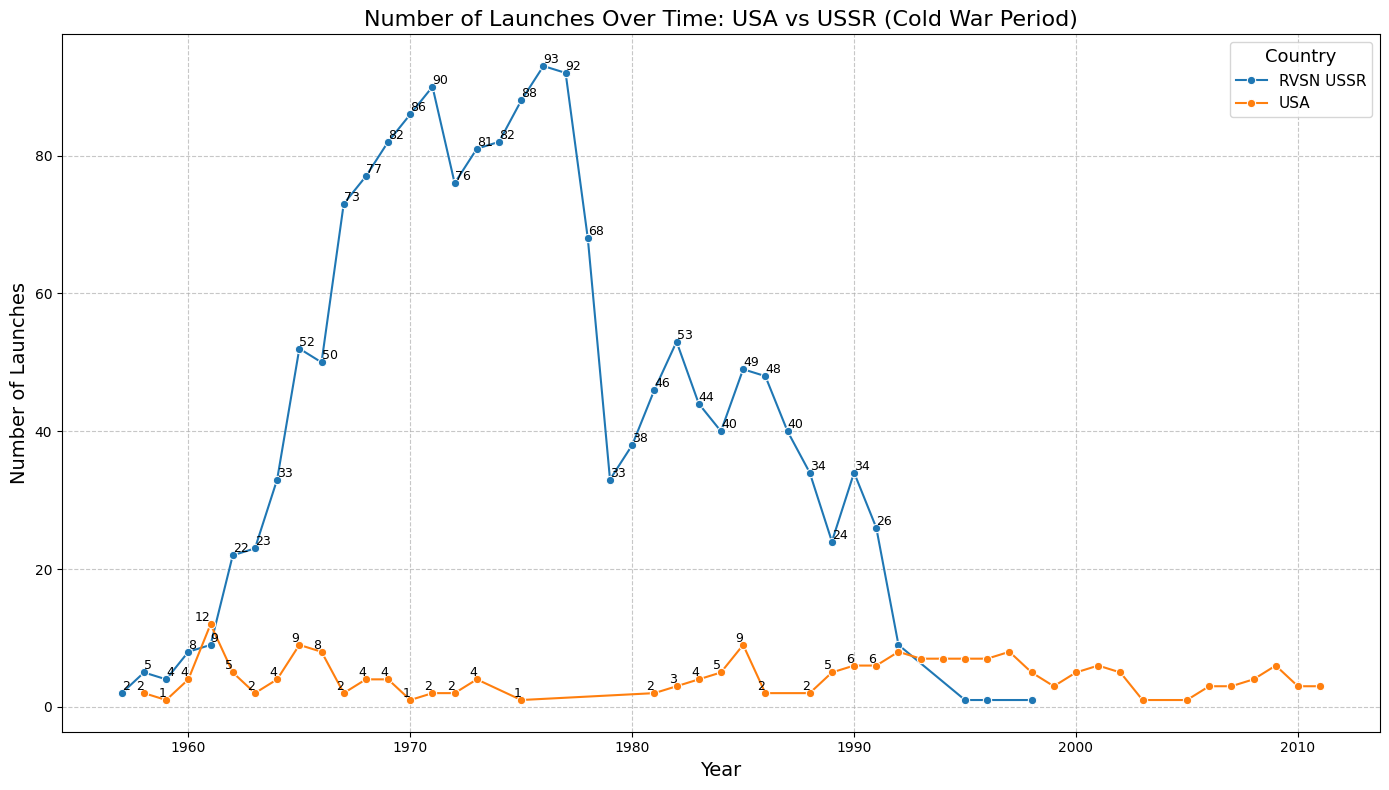

In [70]:
# Assuming launches_per_year_country is already loaded and preprocessed
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the number of launches over time for USA and USSR with improvisations
sns.lineplot(x='Year', y='launches', hue='Organisation', data=launches_per_year, marker='o')

# Add data labels to each point
for i in range(len(launches_per_year_country)):
    plt.text(launches_per_year_country['Year'][i],
             launches_per_year_country['launches'][i],
             launches_per_year_country['launches'][i],
             ha='right' if launches_per_year_country['Organisation'][i] == 'USA' else 'left',
             va='bottom', fontsize=9)

# Customize title and labels
plt.title('Number of Launches Year-On-Year: USA vs USSR', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

# Customize legend
plt.legend(title='Country', title_fontsize='13', fontsize='11')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
# Using Plotly for an interactive plot
fig = px.line(launches_per_year, x='Year', y='launches', color='Organisation',
              title='Number of Launches Year-On-Year: USA vs USSR',
              labels={'year': 'Year', 'launches': 'Number of Launches', 'Organisation': 'Country'})
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [72]:
# Filter for mission failures
# Assuming 'Mission_Status' column contains mission outcome information
failure_df = df_data[df_data['Mission_Status'].str.contains('Failure', case=False, na=False)]

# Group by year and count the number of mission failures
failures_per_year = failure_df.groupby('Year').size().reset_index(name='failures')

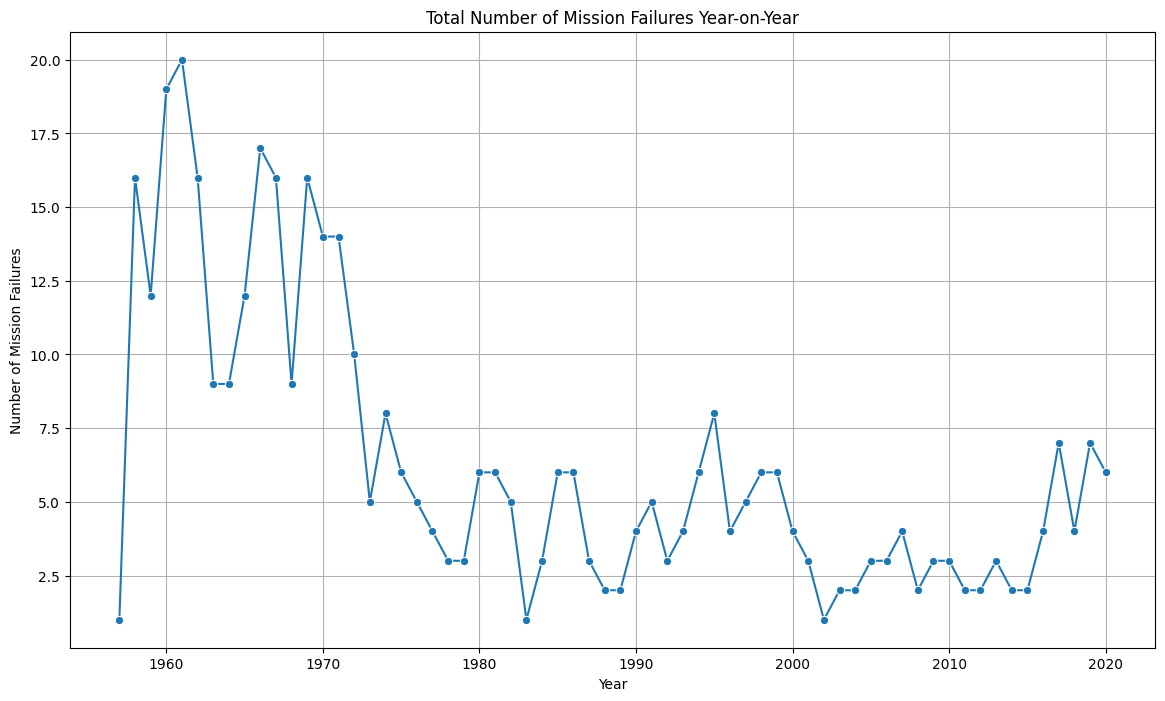

In [73]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the number of mission failures over time
sns.lineplot(x='Year', y='failures', data=failures_per_year, marker='o')

# Add title and labels
plt.title('Total Number of Mission Failures Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.grid(True)
plt.show()

# Using Plotly for an interactive plot
fig = px.line(failures_per_year, x='Year', y='failures',
              title='Total Number of Mission Failures Year-on-Year',
              labels={'Year': 'Year', 'failures': 'Number of Mission Failures'})
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [74]:
# Calculate the total number of launches per year
total_launches_per_year = df_data.groupby('Year').size().reset_index(name='total_launches')

# Filter for mission failures
# Assuming 'Mission_Status' column contains mission outcome information
failure_df = df_data[df_data['Mission_Status'].str.contains('Failure', case=False, na=False)]

# Calculate the number of mission failures per year
failures_per_year = failure_df.groupby('Year').size().reset_index(name='failures')

In [75]:
# Merge the total launches and failures dataframes
launches_failures_df = pd.merge(total_launches_per_year, failures_per_year, on='Year', how='left')

# Calculate the percentage of failures
launches_failures_df['failure_percentage'] = (launches_failures_df['failures'] / launches_failures_df['total_launches']) * 100

# Fill NaN values with 0 (years with no failures)
launches_failures_df['failure_percentage'].fillna(0, inplace=True)

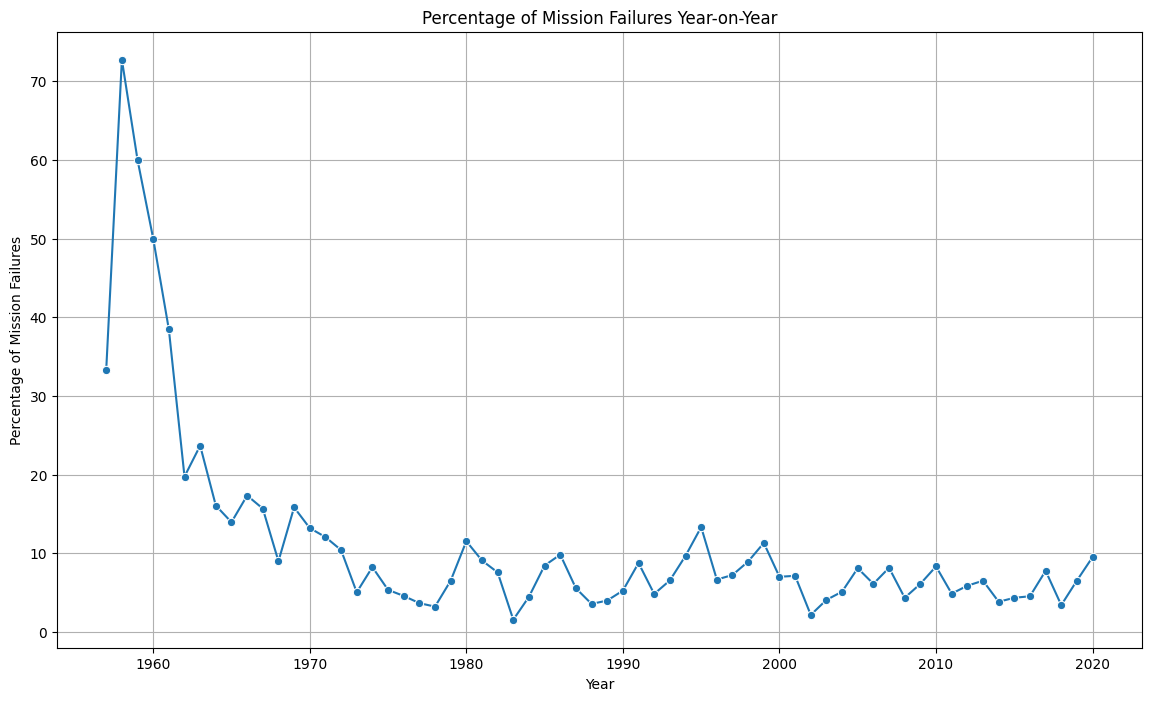

In [76]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the percentage of mission failures over time
sns.lineplot(x='Year', y='failure_percentage', data=launches_failures_df, marker='o')

# Add title and labels
plt.title('Percentage of Mission Failures Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Mission Failures')
plt.grid(True)
plt.show()

# Using Plotly for an interactive plot
fig = px.line(launches_failures_df, x='Year', y='failure_percentage',
              title='Percentage of Mission Failures Year-on-Year',
              labels={'Year': 'Year', 'failure_percentage': 'Percentage of Mission Failures'})
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# **Improvisasi, karena kode dari ini menggunakan variabel organisasi bukan negara**

In [92]:
# Calculate the total number of launches per year by country
tlpy_country = df_data.groupby(['Year', 'launch_country']).size().reset_index(name='total_launches')

# Determine the leading country each year
lcpy_country = tlpy_country.loc[tlpy_country.groupby('Year')['total_launches'].idxmax()]

# Filter for successful launches
success_df = df_data[df_data['Mission_Status'].str.contains('Success', case=False, na=False)]

# Calculate the number of successful launches per year by country
slpy_country = success_df.groupby(['Year', 'launch_country']).size().reset_index(name='successful_launches')

# Determine the leading country in successful launches each year
lscpy_country = slpy_country.loc[slpy_country.groupby('Year')['successful_launches'].idxmax()]


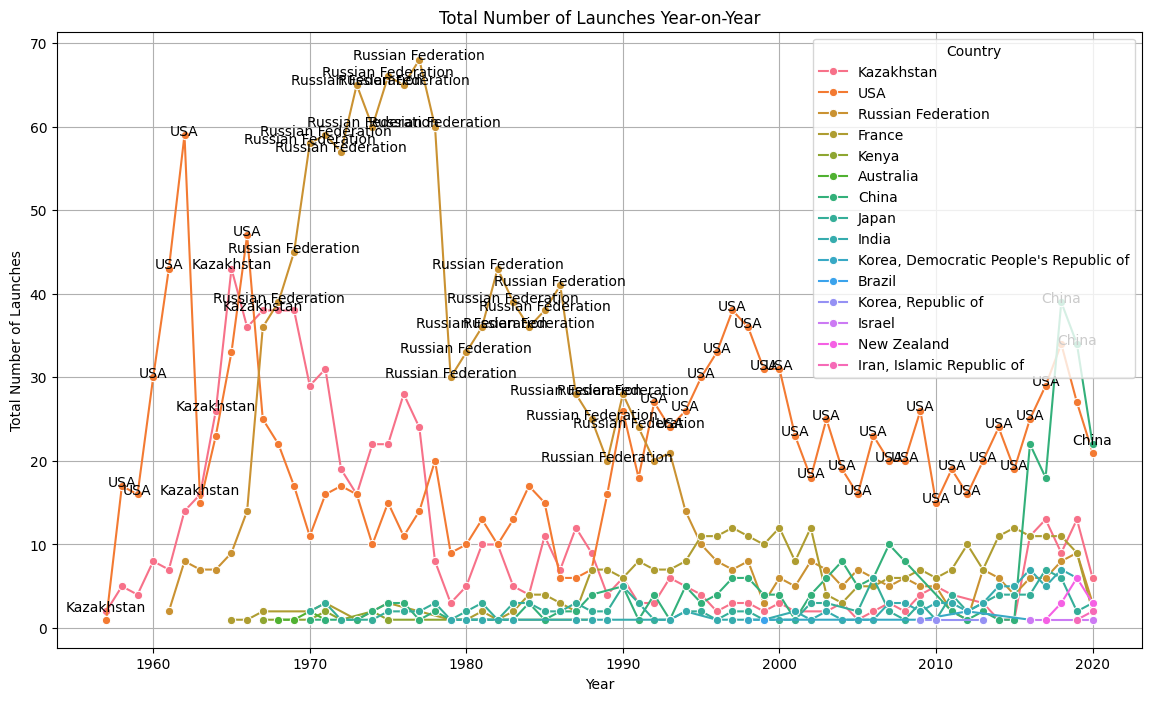

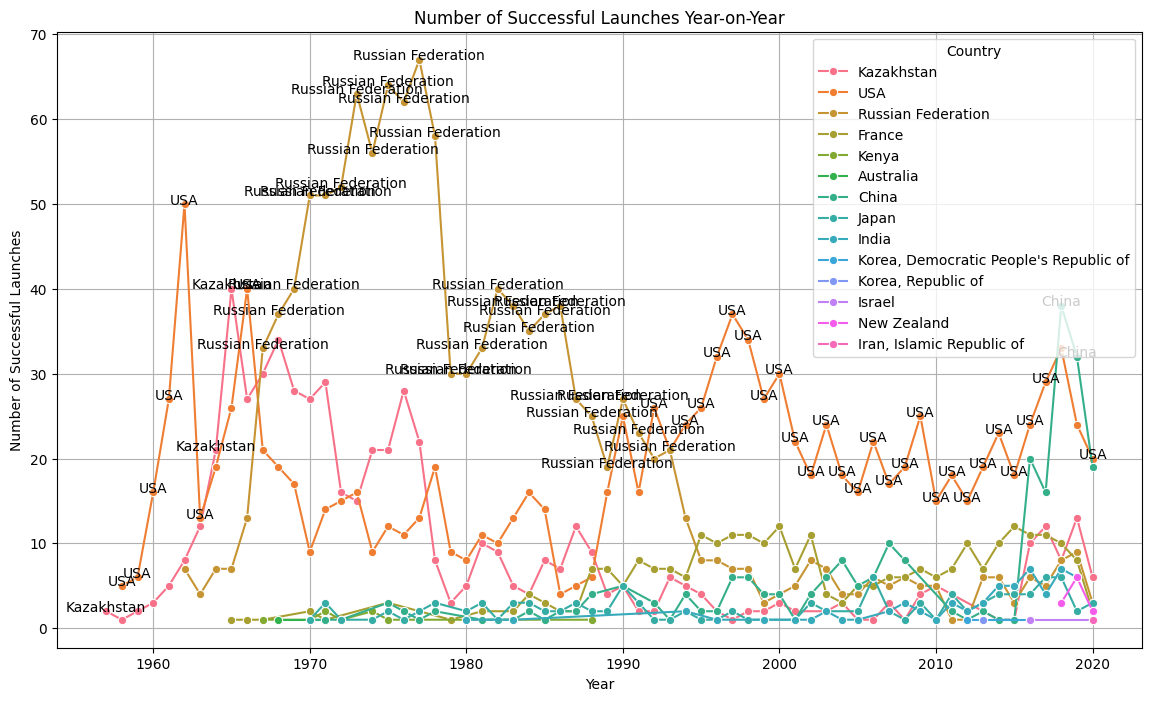

In [93]:
# Visualization
plt.figure(figsize=(14, 8))

# Plot the total number of launches
sns.lineplot(x='Year', y='total_launches', hue='launch_country', data=tlpy_country, marker='o', legend='full')

# Highlight the leading country each year
for i, row in lcpy_country.iterrows():
    plt.text(row['Year'], row['total_launches'], row['launch_country'], color='black', ha='center')

# Add title and labels
plt.title('Total Number of Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Plot for successful launches
plt.figure(figsize=(14, 8))

# Plot the number of successful launches
sns.lineplot(x='Year', y='successful_launches', hue='launch_country', data=slpy_country, marker='o', legend='full')

# Highlight the leading country each year
for i, row in lscpy_country.iterrows():
    plt.text(row['Year'], row['successful_launches'], row['launch_country'], color='black', ha='center')

# Add title and labels
plt.title('Number of Successful Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# **Improvisasi ke-2. merapikan visualisasi**

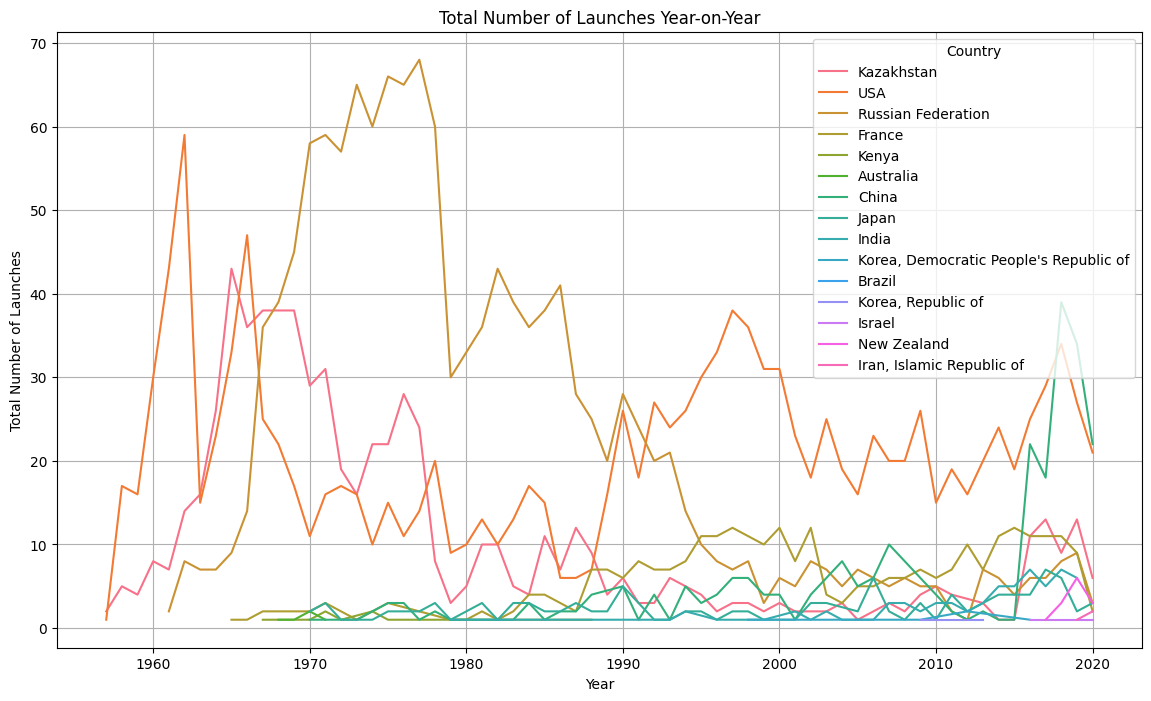

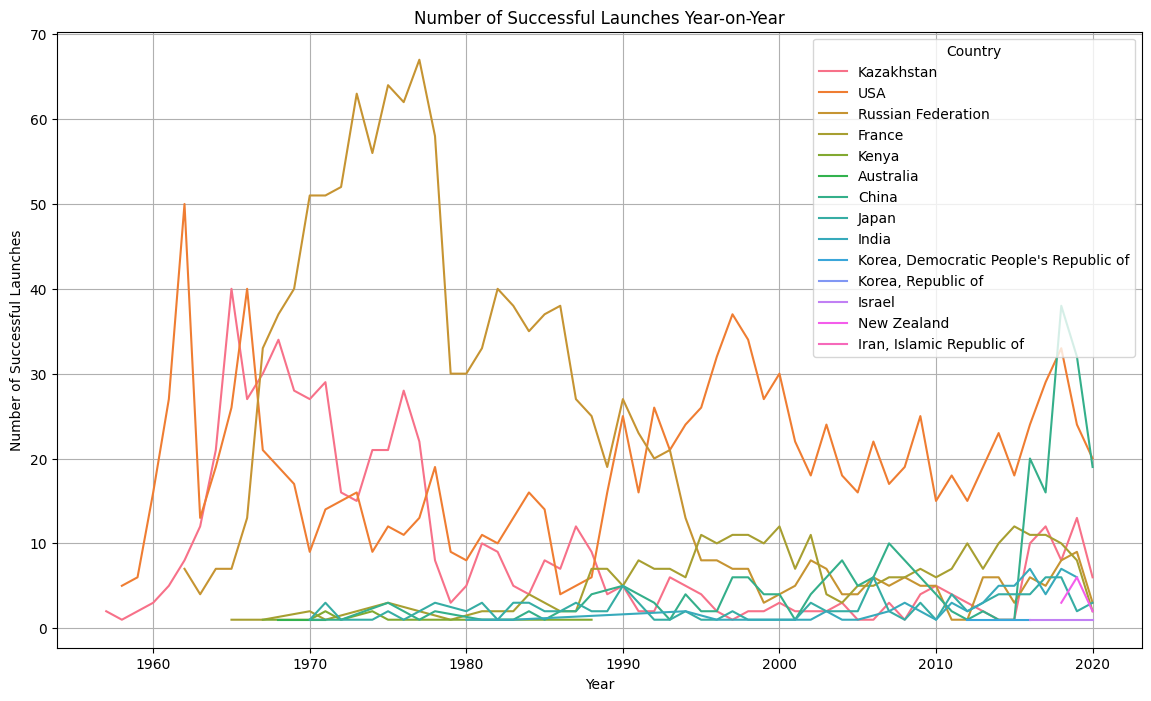

In [95]:
# Visualization
plt.figure(figsize=(14, 8))

# Plot the total number of launches
sns.lineplot(x='Year', y='total_launches', hue='launch_country', data=tlpy_country, legend='full')

# Add title and labels
plt.title('Total Number of Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Plot for successful launches
plt.figure(figsize=(14, 8))

# Plot the number of successful launches
sns.lineplot(x='Year', y='successful_launches', hue='launch_country', data=slpy_country, legend='full')

# Add title and labels
plt.title('Number of Successful Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# **Kode Bantuan**

In [77]:
# Filter out data up to and including 2020
df_data = df_data[df_data['Year'] <= 2020]

# Calculate the total number of launches per year by country
total_launches_per_year = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='total_launches')

# Determine the leading country each year
leading_country_per_year = total_launches_per_year.loc[total_launches_per_year.groupby('Year')['total_launches'].idxmax()]

# Filter for successful launches
success_df = df_data[df_data['Mission_Status'].str.contains('Success', case=False, na=False)]

# Calculate the number of successful launches per year by country
successful_launches_per_year = success_df.groupby(['Year', 'Organisation']).size().reset_index(name='successful_launches')

# Determine the leading country in successful launches each year
leading_success_country_per_year = successful_launches_per_year.loc[successful_launches_per_year.groupby('Year')['successful_launches'].idxmax()]


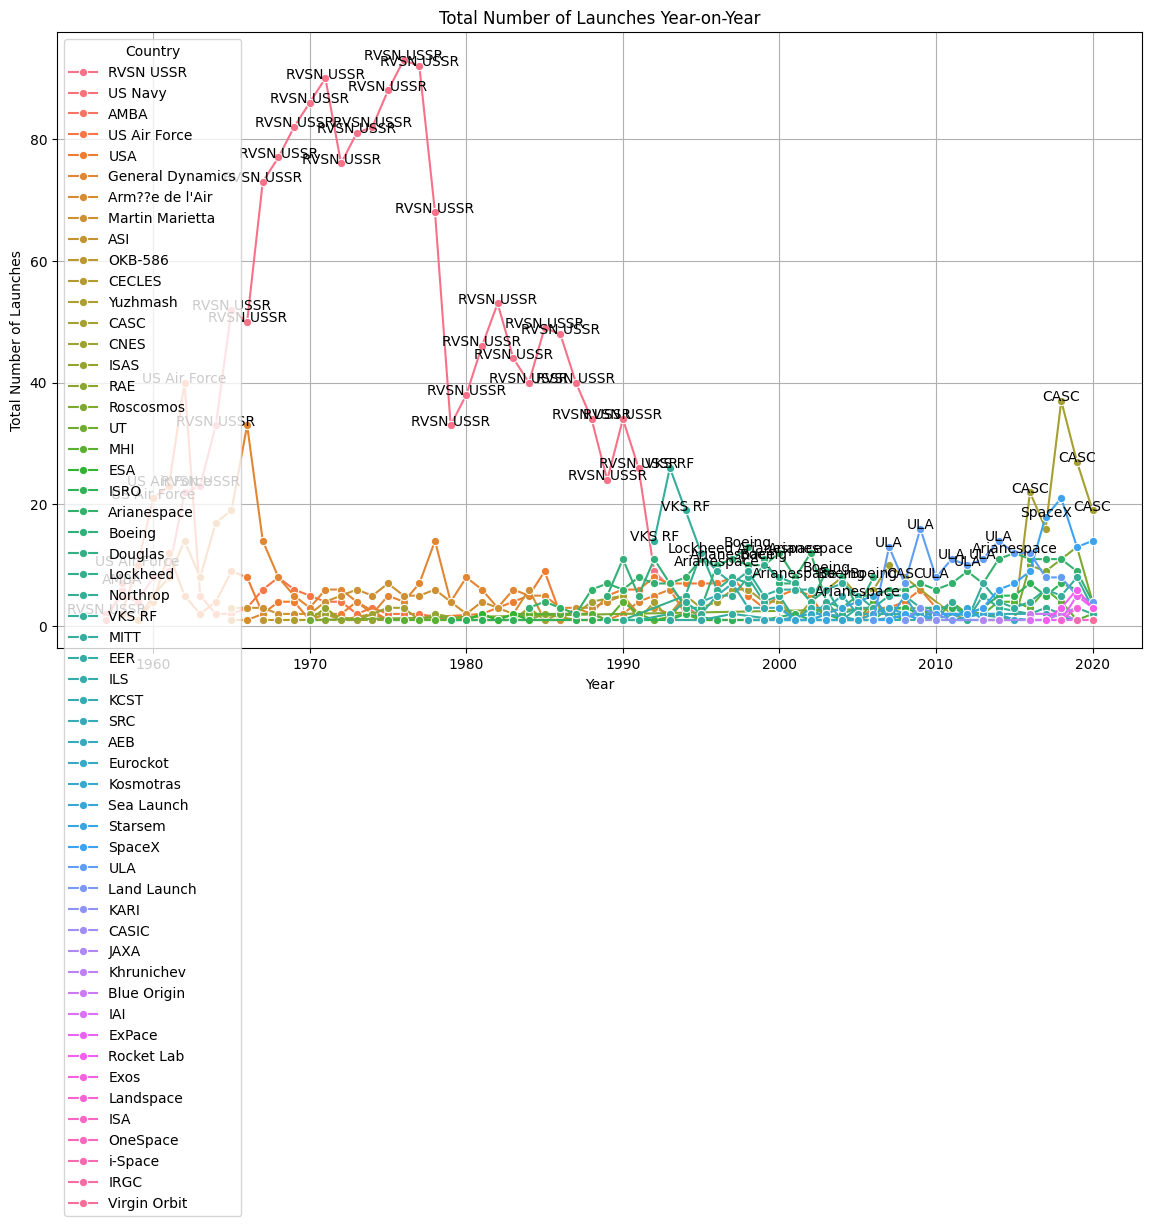

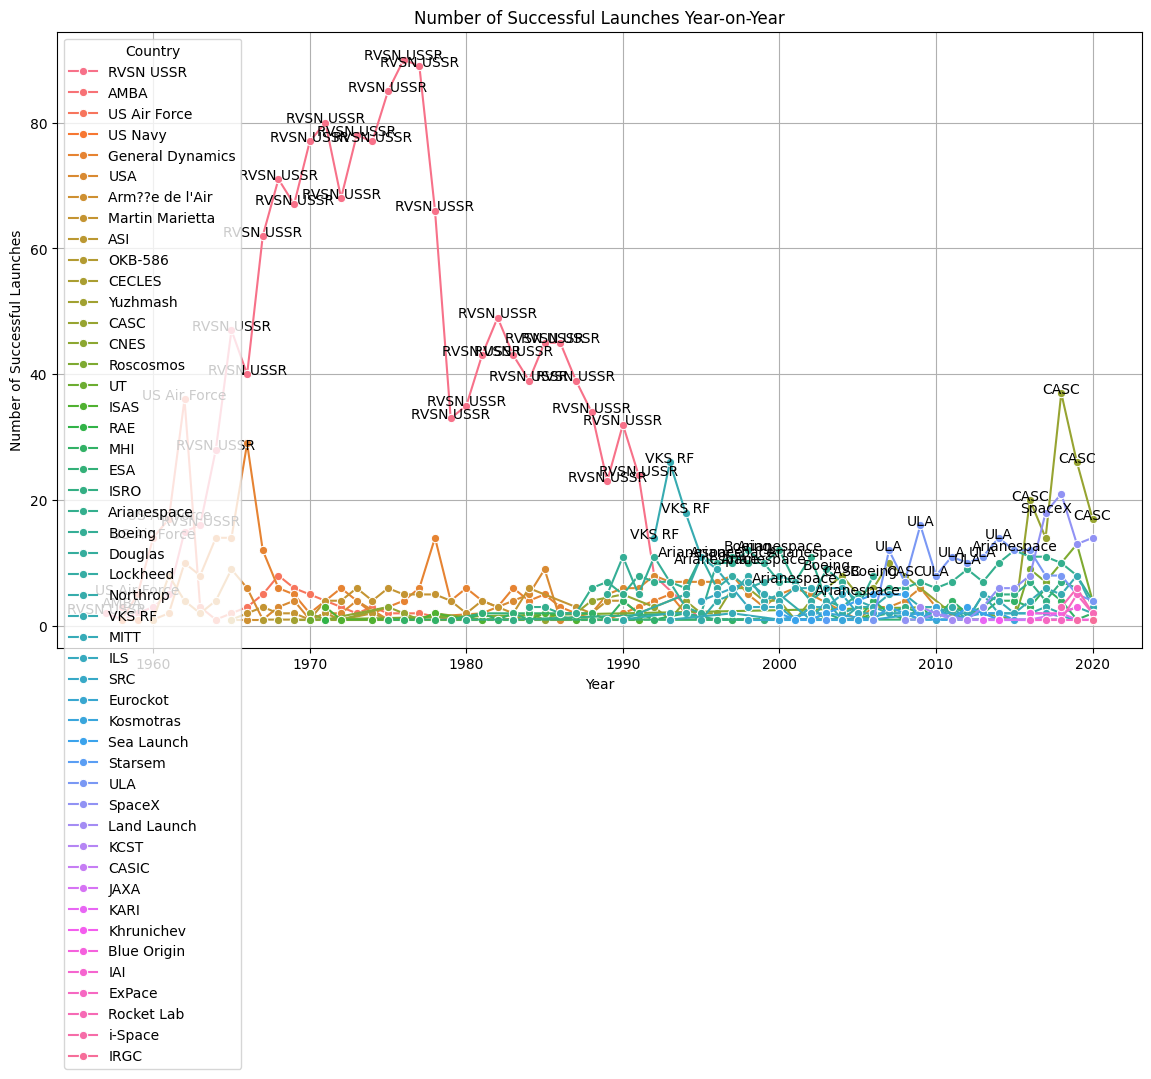

In [78]:
# Visualization
plt.figure(figsize=(14, 8))

# Plot the total number of launches
sns.lineplot(x='Year', y='total_launches', hue='Organisation', data=total_launches_per_year, marker='o', legend='full')

# Highlight the leading country each year
for i, row in leading_country_per_year.iterrows():
    plt.text(row['Year'], row['total_launches'], row['Organisation'], color='black', ha='center')

# Add title and labels
plt.title('Total Number of Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Plot for successful launches
plt.figure(figsize=(14, 8))

# Plot the number of successful launches
sns.lineplot(x='Year', y='successful_launches', hue='Organisation', data=successful_launches_per_year, marker='o', legend='full')

# Highlight the leading country each year
for i, row in leading_success_country_per_year.iterrows():
    plt.text(row['Year'], row['successful_launches'], row['Organisation'], color='black', ha='center')

# Add title and labels
plt.title('Number of Successful Launches Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [79]:
# Calculate the total number of launches per year by organization
total_launches_per_year = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='total_launches')

# Determine the leading organization each year
leading_org_per_year = total_launches_per_year.loc[total_launches_per_year.groupby('Year')['total_launches'].idxmax()]

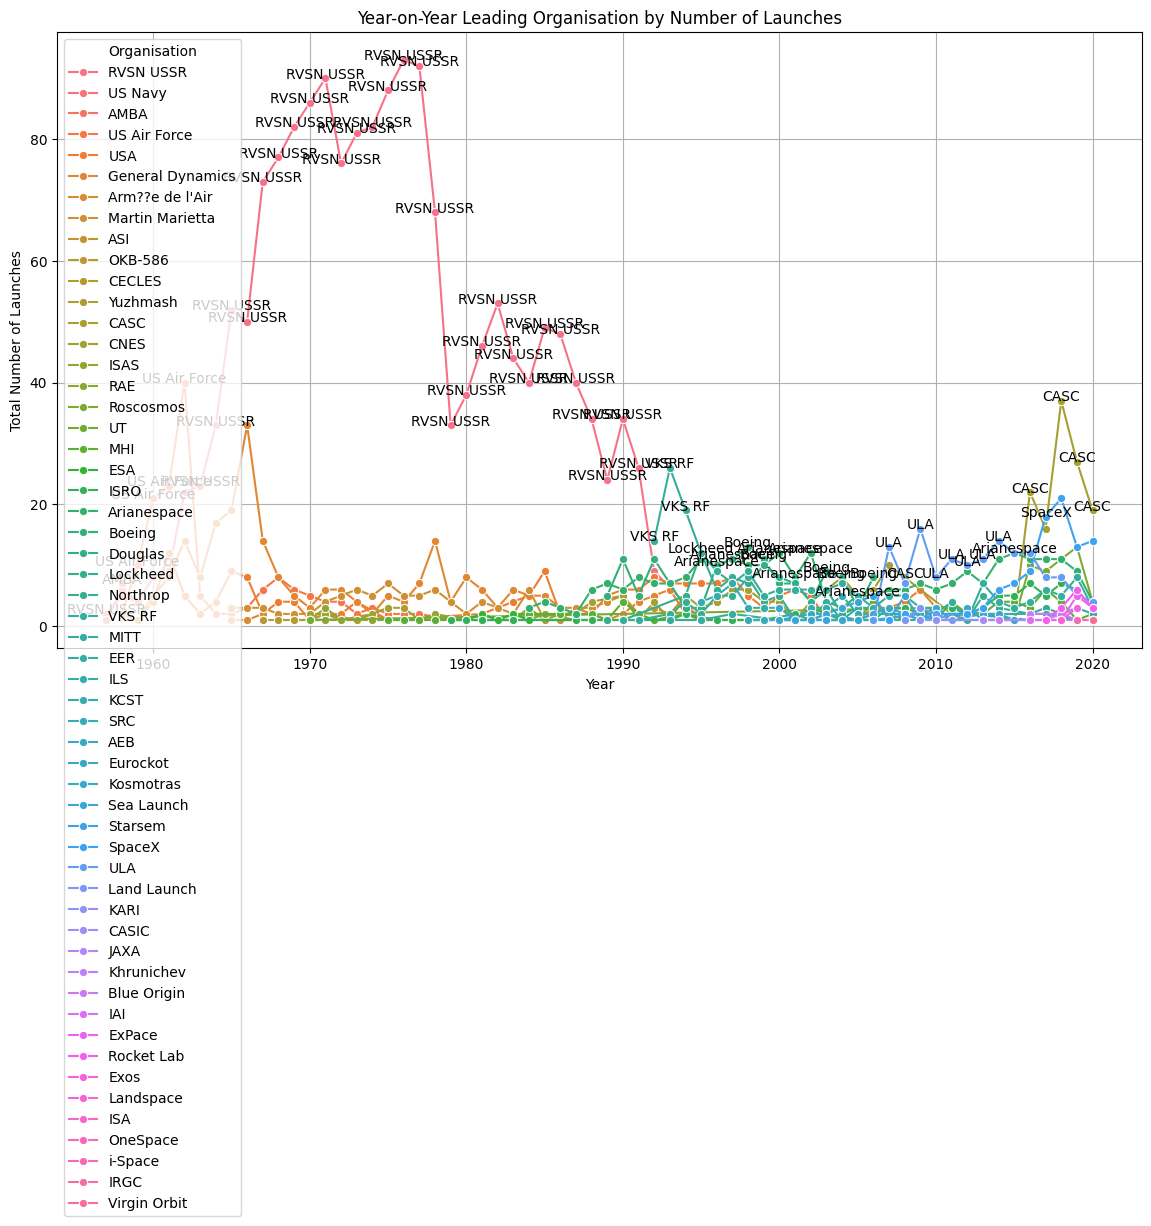

Dominant organization in the 1970s and 1980s:
        Year Organisation  total_launches
73  1,970.00    RVSN USSR              86
86  1,971.00    RVSN USSR              90
94  1,972.00    RVSN USSR              76
101 1,973.00    RVSN USSR              81
109 1,974.00    RVSN USSR              82
118 1,975.00    RVSN USSR              88
126 1,976.00    RVSN USSR              93
133 1,977.00    RVSN USSR              92
140 1,978.00    RVSN USSR              68
147 1,979.00    RVSN USSR              33
155 1,980.00    RVSN USSR              38
163 1,981.00    RVSN USSR              46
171 1,982.00    RVSN USSR              53
181 1,983.00    RVSN USSR              44
191 1,984.00    RVSN USSR              40
199 1,985.00    RVSN USSR              49
206 1,986.00    RVSN USSR              48
215 1,987.00    RVSN USSR              40
224 1,988.00    RVSN USSR              34
234 1,989.00    RVSN USSR              24

Dominant organization in 2018, 2019, and 2020:
        Year Organisatio

In [80]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot the total number of launches
sns.lineplot(x='Year', y='total_launches', hue='Organisation', data=total_launches_per_year, marker='o', legend='full')

# Highlight the leading organization each year
for i, row in leading_org_per_year.iterrows():
    plt.text(row['Year'], row['total_launches'], row['Organisation'], color='black', ha='center')

# Add title and labels
plt.title('Year-on-Year Leading Organisation by Number of Launches')
plt.xlabel('Year')
plt.ylabel('Total Number of Launches')
plt.legend(title='Organisation')
plt.grid(True)
plt.show()

# Display the leading organizations in specific decades and years
print("Dominant organization in the 1970s and 1980s:")
print(leading_org_per_year[(leading_org_per_year['Year'] >= 1970) & (leading_org_per_year['Year'] < 1990)])

print("\nDominant organization in 2018, 2019, and 2020:")
print(leading_org_per_year[leading_org_per_year['Year'].isin([2018, 2019, 2020])])